Name - Kunal Mody

Batch - DS2312

#### Project Description
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 14,000 power plants from 3 countries(USA, AUS, INDIA) and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database

The database includes the following indicators:

•	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

•	`country_long` (text): longer form of the country designation

•	`name` (text): name or title of the power plant, generally in Romanized form

•	`gppd_idnr` (text): 10 or 12 character identifier for the power plant

•	`capacity_mw` (number): electrical generating capacity in megawatts

•	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

•	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

•	`primary_fuel` (text): energy source used in primary electricity generation or export

•	`other_fuel1` (text): energy source used in electricity generation or export

•	`other_fuel2` (text): energy source used in electricity generation or export

•	`other_fuel3` (text): energy source used in electricity generation or export

•	 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available

•	`owner` (text): majority shareholder of the power plant, generally in Romanized form

•	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

•	`url` (text): web document corresponding to the `source` field

•	`geolocation_source` (text): attribution for geolocation information

•	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

•	`year_of_capacity_data` (number): year the capacity information was reported

•	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013

•	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014

•	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015

•	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016

•	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017

•	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018

•	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019

•	`generation_data_source` (text): attribution for the reported generation information

•	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013

•	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 

•	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 

•	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 

•	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 

•	'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

•	`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 

•	`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015

•	`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016

•	`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017

Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories. 

##### Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# we have total 3 dataset for this project. we will call it as 'df1', 'df2' & 'df3'

In [3]:
df1 = pd.read_csv('database_AUS.csv')
df1

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,AUS,Australia,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,NaN,...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator,NaN
3,AUS,Australia,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Australia,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,AUS,Australia,Yarrawonga,AUS0000101,9.00,-36.0094,145.9995,Hydro,NaN,NaN,...,2019.0,38.216111,44.224722,50.183889,46.035278,31.444722,37.317778,NaN,Australia Clean Energy Regulator,NaN
508,AUS,Australia,Yarwun,AUS0000173,154.00,-23.8306,151.1519,Gas,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509,AUS,Australia,Yuendumu,AUS0000465,0.24,-22.2426,131.7931,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,5.216667,5.176944,5.341111,NaN,Australia Clean Energy Regulator,NaN
510,AUS,Australia,Yulara,AUS0000257,10.95,-25.2323,130.9912,Gas,NaN,NaN,...,2019.0,21.947500,22.775000,24.086111,23.043889,19.885000,19.558056,NaN,Australia Clean Energy Regulator,NaN


In [4]:
df2 = pd.read_csv('database_IND.csv')
df2

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,2.41461,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,1.92500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,2.05400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df3= pd.read_csv('database_USA.csv')
df3

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,USA,United States of America,10 Briggs Solar NG LLC (East),USA0062781,0.0,41.6327,-71.4963,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USA,United States of America,100 Brook Hill Drive Solar,USA0063292,2.0,41.0930,-73.9828,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,2.46700,U.S. Energy Information Administration,NaN
2,USA,United States of America,1001 Ebenezer Church Solar,USA0063444,0.0,36.2838,-80.8434,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USA,United States of America,1008 Matthews Solar,USA0063447,0.0,36.2167,-80.5525,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USA,United States of America,1009 Yadkin Solar,USA0063445,0.0,36.1475,-80.6561,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11874,USA,United States of America,Zotos International WPGF,USA0057648,3.4,42.8869,-76.9683,Wind,NaN,NaN,...,2019.0,3.671,2.46015,2.489,1.670,1.23349,2.630,1.21100,U.S. Energy Information Administration,NaN
11875,USA,United States of America,Zumbro Community Solar Garden,USA0061574,1.0,44.3195,-92.6703,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,1.161,1.58900,U.S. Energy Information Administration,NaN
11876,USA,United States of America,Zumbro Solar Garden,USA0063426,0.0,44.0460,-92.7600,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11877,USA,United States of America,Zuni,USA0000478,0.0,39.7373,-105.0170,NaN,NaN,NaN,...,2019.0,0.000,0.00000,0.000,NaN,NaN,NaN,NaN,U.S. Energy Information Administration,NaN


In [6]:
# As our data is given in three different dataset, we need to mearge all data into 1 dataset so that we can perform our analysis
# I am using pd.concat method to connect all dataset 

In [7]:
df = pd.concat(map(pd.read_csv,['database_AUS.csv','database_IND.csv','database_USA.csv']),ignore_index = True)
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,AUS,Australia,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,NaN,...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator,NaN
3,AUS,Australia,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Australia,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13293,USA,United States of America,Zotos International WPGF,USA0057648,3.40,42.8869,-76.9683,Wind,NaN,NaN,...,2019.0,3.671000,2.460150,2.489000,1.670000,1.233490,2.630000,1.211,U.S. Energy Information Administration,NaN
13294,USA,United States of America,Zumbro Community Solar Garden,USA0061574,1.00,44.3195,-92.6703,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,1.161000,1.589,U.S. Energy Information Administration,NaN
13295,USA,United States of America,Zumbro Solar Garden,USA0063426,0.00,44.0460,-92.7600,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13296,USA,United States of America,Zuni,USA0000478,0.00,39.7373,-105.0170,NaN,NaN,NaN,...,2019.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,U.S. Energy Information Administration,NaN


In [8]:
# so now all three dataset has been mearge into one dataset 'df'
# we will now perform all steps on 'df' dataset to get our result

In [9]:
df.shape

(13298, 27)

In [10]:
df.isnull().sum()

country                         0
country_long                    0
name                            0
gppd_idnr                       0
capacity_mw                     6
latitude                       78
longitude                      78
primary_fuel                 2004
other_fuel1                 11670
other_fuel2                 13028
other_fuel3                 13206
commissioning_year           2644
owner                         593
source                          0
url                             0
geolocation_source             23
wepp_id                     13298
year_of_capacity_data         438
generation_gwh_2013          6128
generation_gwh_2014          5764
generation_gwh_2015          5305
generation_gwh_2016          4597
generation_gwh_2017          4006
generation_gwh_2018          3440
generation_gwh_2019          3520
generation_data_source       2463
estimated_generation_gwh    13298
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13298 entries, 0 to 13297
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   13298 non-null  object 
 1   country_long              13298 non-null  object 
 2   name                      13298 non-null  object 
 3   gppd_idnr                 13298 non-null  object 
 4   capacity_mw               13292 non-null  float64
 5   latitude                  13220 non-null  float64
 6   longitude                 13220 non-null  float64
 7   primary_fuel              11294 non-null  object 
 8   other_fuel1               1628 non-null   object 
 9   other_fuel2               270 non-null    object 
 10  other_fuel3               92 non-null     object 
 11  commissioning_year        10654 non-null  float64
 12  owner                     12705 non-null  object 
 13  source                    13298 non-null  object 
 14  url   

<Axes: >

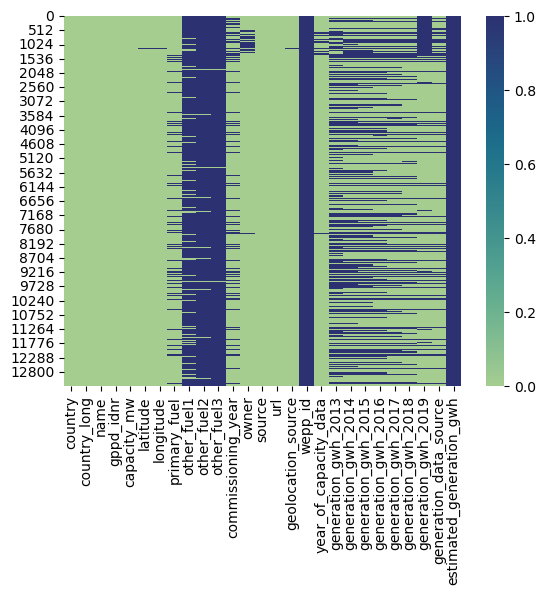

In [12]:
sns.heatmap(df.isnull(),cmap ='crest')

In [13]:
# from above output we can clearly see that we have high numbers of null values present in our dataset.


In [14]:
print(df.nunique().to_frame('Total Unique Values'), print('Total Entry in dataset : -', df.shape[0]))

Total Entry in dataset : - 13298
                          Total Unique Values
country                                     3
country_long                                3
name                                    13266
gppd_idnr                               13298
capacity_mw                              2304
latitude                                12385
longitude                               12733
primary_fuel                               14
other_fuel1                                12
other_fuel2                                11
other_fuel3                                 9
commissioning_year                       1936
owner                                    5877
source                                    206
url                                       325
geolocation_source                          5
wepp_id                                     0
year_of_capacity_data                       1
generation_gwh_2013                      5616
generation_gwh_2014                      6306
g

In [15]:
# we know that 'country_long' and 'country' represents same so will be dropping 'country_long' from dataframe


In [16]:
df = df.drop(columns=['country_long'], axis= 1)
df

,country,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,AUS,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,NaN,NaN,...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator,NaN
3,AUS,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13293,USA,Zotos International WPGF,USA0057648,3.40,42.8869,-76.9683,Wind,NaN,NaN,NaN,...,2019.0,3.671000,2.460150,2.489000,1.670000,1.233490,2.630000,1.211,U.S. Energy Information Administration,NaN
13294,USA,Zumbro Community Solar Garden,USA0061574,1.00,44.3195,-92.6703,Solar,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,1.161000,1.589,U.S. Energy Information Administration,NaN
13295,USA,Zumbro Solar Garden,USA0063426,0.00,44.0460,-92.7600,NaN,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13296,USA,Zuni,USA0000478,0.00,39.7373,-105.0170,NaN,NaN,NaN,NaN,...,2019.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,U.S. Energy Information Administration,NaN


In [17]:
# now we will find % of missing/nul values from our dataset

In [18]:
missing_values = df.isnull().sum().sort_values(ascending = False)
per_of_missing_values = (missing_values/len(df))*100
print(pd.concat([missing_values,per_of_missing_values],axis = 1,keys =['Missing Values', ' % of missing data ']))

                          Missing Values   % of missing data 
estimated_generation_gwh           13298           100.000000
wepp_id                            13298           100.000000
other_fuel3                        13206            99.308167
other_fuel2                        13028            97.969619
other_fuel1                        11670            87.757558
generation_gwh_2013                 6128            46.082118
generation_gwh_2014                 5764            43.344864
generation_gwh_2015                 5305            39.893217
generation_gwh_2016                 4597            34.569108
generation_gwh_2017                 4006            30.124831
generation_gwh_2019                 3520            26.470146
generation_gwh_2018                 3440            25.868552
commissioning_year                  2644            19.882689
generation_data_source              2463            18.521582
primary_fuel                        2004            15.069935
owner   

In [19]:
# following columns has no impact on our dataset so we will drop those columns,
# 'wepp_id', 'url','estimated_generation_gwh', 'other_fuel3', 'other_fuel2' 

In [20]:
df.drop(columns=['wepp_id','estimated_generation_gwh','other_fuel3','other_fuel2'], axis =1, inplace = True)
df

,country,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,...,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
0,AUS,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,NaN,2011.00000,Adelaide Airport Ltd,...,Australian Renewable Energy Mapping Infrastruc...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,NaN,Adelaide Showgrounds,...,Australian Renewable Energy Mapping Infrastruc...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,NaN,Verve Energy,...,Australian Renewable Energy Mapping Infrastruc...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator
3,AUS,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,NaN,2004.00000,Alice Springs Airport,...,Australian Renewable Energy Mapping Infrastruc...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,NaN,2015.00000,Energy Response,...,Australian Renewable Energy Mapping Infrastruc...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13293,USA,Zotos International WPGF,USA0057648,3.40,42.8869,-76.9683,Wind,NaN,2012.00000,Zotos International,...,U.S. Energy Information Administration,2019.0,3.671000,2.460150,2.489000,1.670000,1.233490,2.630000,1.211,U.S. Energy Information Administration
13294,USA,Zumbro Community Solar Garden,USA0061574,1.00,44.3195,-92.6703,Solar,NaN,2018.00000,Zumbro Solar LLC,...,U.S. Energy Information Administration,2019.0,NaN,NaN,NaN,NaN,NaN,1.161000,1.589,U.S. Energy Information Administration
13295,USA,Zumbro Solar Garden,USA0063426,0.00,44.0460,-92.7600,NaN,NaN,NaN,Zumbro Garden LLC,...,U.S. Energy Information Administration,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13296,USA,Zuni,USA0000478,0.00,39.7373,-105.0170,NaN,NaN,NaN,Public Service Co of Colorado,...,U.S. Energy Information Administration,2019.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,U.S. Energy Information Administration


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13298 entries, 0 to 13297
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 13298 non-null  object 
 1   name                    13298 non-null  object 
 2   gppd_idnr               13298 non-null  object 
 3   capacity_mw             13292 non-null  float64
 4   latitude                13220 non-null  float64
 5   longitude               13220 non-null  float64
 6   primary_fuel            11294 non-null  object 
 7   other_fuel1             1628 non-null   object 
 8   commissioning_year      10654 non-null  float64
 9   owner                   12705 non-null  object 
 10  source                  13298 non-null  object 
 11  url                     13298 non-null  object 
 12  geolocation_source      13275 non-null  object 
 13  year_of_capacity_data   12860 non-null  float64
 14  generation_gwh_2013     7170 non-null 

In [22]:
df.drop(columns=['url'],axis=1, inplace=True)
df

,country,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,...,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
0,AUS,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,NaN,2011.00000,Adelaide Airport Ltd,...,Australian Renewable Energy Mapping Infrastruc...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,NaN,Adelaide Showgrounds,...,Australian Renewable Energy Mapping Infrastruc...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,NaN,Verve Energy,...,Australian Renewable Energy Mapping Infrastruc...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator
3,AUS,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,NaN,2004.00000,Alice Springs Airport,...,Australian Renewable Energy Mapping Infrastruc...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,NaN,2015.00000,Energy Response,...,Australian Renewable Energy Mapping Infrastruc...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13293,USA,Zotos International WPGF,USA0057648,3.40,42.8869,-76.9683,Wind,NaN,2012.00000,Zotos International,...,U.S. Energy Information Administration,2019.0,3.671000,2.460150,2.489000,1.670000,1.233490,2.630000,1.211,U.S. Energy Information Administration
13294,USA,Zumbro Community Solar Garden,USA0061574,1.00,44.3195,-92.6703,Solar,NaN,2018.00000,Zumbro Solar LLC,...,U.S. Energy Information Administration,2019.0,NaN,NaN,NaN,NaN,NaN,1.161000,1.589,U.S. Energy Information Administration
13295,USA,Zumbro Solar Garden,USA0063426,0.00,44.0460,-92.7600,NaN,NaN,NaN,Zumbro Garden LLC,...,U.S. Energy Information Administration,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13296,USA,Zuni,USA0000478,0.00,39.7373,-105.0170,NaN,NaN,NaN,Public Service Co of Colorado,...,U.S. Energy Information Administration,2019.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,U.S. Energy Information Administration


In [23]:
# some of the columns haas no impact on output so will drop those columns
# gppd_idnr, generation_data_source, owner

In [24]:
df.drop(columns=['gppd_idnr','generation_data_source', 'owner'], axis= 1, inplace =True)
df

,country,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,AUS,Adelaide Airport,0.11,-34.9387,138.5377,Solar,NaN,2011.00000,Australian Renewable Energy Mapping Infrastruc...,Australian Renewable Energy Mapping Infrastruc...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Adelaide Showgrounds,1.00,-34.9453,138.5882,Solar,NaN,NaN,Australian Renewable Energy Mapping Infrastruc...,Australian Renewable Energy Mapping Infrastruc...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Albany Wind Farm,21.60,-35.0641,117.7977,Wind,NaN,NaN,Australian Renewable Energy Mapping Infrastruc...,Australian Renewable Energy Mapping Infrastruc...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN
3,AUS,Alice Springs Airport,0.24,-23.7966,133.8971,Solar,NaN,2004.00000,Australian Renewable Energy Mapping Infrastruc...,Australian Renewable Energy Mapping Infrastruc...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Amcor Gawler,4.00,-34.5509,138.7659,Oil,NaN,2015.00000,Australian Renewable Energy Mapping Infrastruc...,Australian Renewable Energy Mapping Infrastruc...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13293,USA,Zotos International WPGF,3.40,42.8869,-76.9683,Wind,NaN,2012.00000,U.S. Energy Information Administration,U.S. Energy Information Administration,2019.0,3.671000,2.460150,2.489000,1.670000,1.233490,2.630000,1.211
13294,USA,Zumbro Community Solar Garden,1.00,44.3195,-92.6703,Solar,NaN,2018.00000,U.S. Energy Information Administration,U.S. Energy Information Administration,2019.0,NaN,NaN,NaN,NaN,NaN,1.161000,1.589
13295,USA,Zumbro Solar Garden,0.00,44.0460,-92.7600,NaN,NaN,NaN,U.S. Energy Information Administration,U.S. Energy Information Administration,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13296,USA,Zuni,0.00,39.7373,-105.0170,NaN,NaN,NaN,U.S. Energy Information Administration,U.S. Energy Information Administration,2019.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13298 entries, 0 to 13297
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                13298 non-null  object 
 1   name                   13298 non-null  object 
 2   capacity_mw            13292 non-null  float64
 3   latitude               13220 non-null  float64
 4   longitude              13220 non-null  float64
 5   primary_fuel           11294 non-null  object 
 6   other_fuel1            1628 non-null   object 
 7   commissioning_year     10654 non-null  float64
 8   source                 13298 non-null  object 
 9   geolocation_source     13275 non-null  object 
 10  year_of_capacity_data  12860 non-null  float64
 11  generation_gwh_2013    7170 non-null   float64
 12  generation_gwh_2014    7534 non-null   float64
 13  generation_gwh_2015    7993 non-null   float64
 14  generation_gwh_2016    8701 non-null   float64
 15  ge

In [26]:
# now we need remove null values from our dataset
# for latitude and longitude we will use mean value and for rest of the numerical columns we will use 0 to replace null values

In [27]:
df['latitude'].fillna(value=df['latitude'].mean(), inplace= True)
df['longitude'].fillna(value=df['longitude'].mean(), inplace= True)
df

,country,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,AUS,Adelaide Airport,0.11,-34.9387,138.5377,Solar,NaN,2011.00000,Australian Renewable Energy Mapping Infrastruc...,Australian Renewable Energy Mapping Infrastruc...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Adelaide Showgrounds,1.00,-34.9453,138.5882,Solar,NaN,NaN,Australian Renewable Energy Mapping Infrastruc...,Australian Renewable Energy Mapping Infrastruc...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Albany Wind Farm,21.60,-35.0641,117.7977,Wind,NaN,NaN,Australian Renewable Energy Mapping Infrastruc...,Australian Renewable Energy Mapping Infrastruc...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN
3,AUS,Alice Springs Airport,0.24,-23.7966,133.8971,Solar,NaN,2004.00000,Australian Renewable Energy Mapping Infrastruc...,Australian Renewable Energy Mapping Infrastruc...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Amcor Gawler,4.00,-34.5509,138.7659,Oil,NaN,2015.00000,Australian Renewable Energy Mapping Infrastruc...,Australian Renewable Energy Mapping Infrastruc...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13293,USA,Zotos International WPGF,3.40,42.8869,-76.9683,Wind,NaN,2012.00000,U.S. Energy Information Administration,U.S. Energy Information Administration,2019.0,3.671000,2.460150,2.489000,1.670000,1.233490,2.630000,1.211
13294,USA,Zumbro Community Solar Garden,1.00,44.3195,-92.6703,Solar,NaN,2018.00000,U.S. Energy Information Administration,U.S. Energy Information Administration,2019.0,NaN,NaN,NaN,NaN,NaN,1.161000,1.589
13295,USA,Zumbro Solar Garden,0.00,44.0460,-92.7600,NaN,NaN,NaN,U.S. Energy Information Administration,U.S. Energy Information Administration,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13296,USA,Zuni,0.00,39.7373,-105.0170,NaN,NaN,NaN,U.S. Energy Information Administration,U.S. Energy Information Administration,2019.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13298 entries, 0 to 13297
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                13298 non-null  object 
 1   name                   13298 non-null  object 
 2   capacity_mw            13292 non-null  float64
 3   latitude               13298 non-null  float64
 4   longitude              13298 non-null  float64
 5   primary_fuel           11294 non-null  object 
 6   other_fuel1            1628 non-null   object 
 7   commissioning_year     10654 non-null  float64
 8   source                 13298 non-null  object 
 9   geolocation_source     13275 non-null  object 
 10  year_of_capacity_data  12860 non-null  float64
 11  generation_gwh_2013    7170 non-null   float64
 12  generation_gwh_2014    7534 non-null   float64
 13  generation_gwh_2015    7993 non-null   float64
 14  generation_gwh_2016    8701 non-null   float64
 15  ge

In [29]:
# now we will get all numerical columns in a group and fil null values

In [30]:
col= ['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','generation_gwh_2019']
df[col] = df[col].fillna(0)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13298 entries, 0 to 13297
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                13298 non-null  object 
 1   name                   13298 non-null  object 
 2   capacity_mw            13292 non-null  float64
 3   latitude               13298 non-null  float64
 4   longitude              13298 non-null  float64
 5   primary_fuel           11294 non-null  object 
 6   other_fuel1            1628 non-null   object 
 7   commissioning_year     10654 non-null  float64
 8   source                 13298 non-null  object 
 9   geolocation_source     13275 non-null  object 
 10  year_of_capacity_data  12860 non-null  float64
 11  generation_gwh_2013    13298 non-null  float64
 12  generation_gwh_2014    13298 non-null  float64
 13  generation_gwh_2015    13298 non-null  float64
 14  generation_gwh_2016    13298 non-null  float64
 15  ge

In [32]:
# we can see that there is no null values in numerical columns
# now we will separate nuerical columns and categorical_columns 

In [33]:
# now our target column  'primary_fuel' is object datatype so we need to convert it to float/int datatype

In [34]:
#label encoding of target column
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
df['primary_fuel'] = encode.fit_transform(df['primary_fuel'])
df.head()

,country,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,AUS,Adelaide Airport,0.11,-34.9387,138.5377,10,NaN,2011.0,Australian Renewable Energy Mapping Infrastruc...,Australian Renewable Energy Mapping Infrastruc...,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,AUS,Adelaide Showgrounds,1.00,-34.9453,138.5882,10,NaN,NaN,Australian Renewable Energy Mapping Infrastruc...,Australian Renewable Energy Mapping Infrastruc...,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,AUS,Albany Wind Farm,21.60,-35.0641,117.7977,13,NaN,NaN,Australian Renewable Energy Mapping Infrastruc...,Australian Renewable Energy Mapping Infrastruc...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,0
3,AUS,Alice Springs Airport,0.24,-23.7966,133.8971,10,NaN,2004.0,Australian Renewable Energy Mapping Infrastruc...,Australian Renewable Energy Mapping Infrastruc...,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,AUS,Amcor Gawler,4.00,-34.5509,138.7659,7,NaN,2015.0,Australian Renewable Energy Mapping Infrastruc...,Australian Renewable Energy Mapping Infrastruc...,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13298 entries, 0 to 13297
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                13298 non-null  object 
 1   name                   13298 non-null  object 
 2   capacity_mw            13292 non-null  float64
 3   latitude               13298 non-null  float64
 4   longitude              13298 non-null  float64
 5   primary_fuel           13298 non-null  int32  
 6   other_fuel1            1628 non-null   object 
 7   commissioning_year     10654 non-null  float64
 8   source                 13298 non-null  object 
 9   geolocation_source     13275 non-null  object 
 10  year_of_capacity_data  12860 non-null  float64
 11  generation_gwh_2013    13298 non-null  float64
 12  generation_gwh_2014    13298 non-null  float64
 13  generation_gwh_2015    13298 non-null  float64
 14  generation_gwh_2016    13298 non-null  float64
 15  ge

In [36]:
encode = LabelEncoder()
df['other_fuel1'] = encode.fit_transform(df['other_fuel1'])
df.head()

,country,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,AUS,Adelaide Airport,0.11,-34.9387,138.5377,10,12,2011.0,Australian Renewable Energy Mapping Infrastruc...,Australian Renewable Energy Mapping Infrastruc...,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,AUS,Adelaide Showgrounds,1.00,-34.9453,138.5882,10,12,NaN,Australian Renewable Energy Mapping Infrastruc...,Australian Renewable Energy Mapping Infrastruc...,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,AUS,Albany Wind Farm,21.60,-35.0641,117.7977,13,12,NaN,Australian Renewable Energy Mapping Infrastruc...,Australian Renewable Energy Mapping Infrastruc...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,0
3,AUS,Alice Springs Airport,0.24,-23.7966,133.8971,10,12,2004.0,Australian Renewable Energy Mapping Infrastruc...,Australian Renewable Energy Mapping Infrastruc...,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,AUS,Amcor Gawler,4.00,-34.5509,138.7659,7,12,2015.0,Australian Renewable Energy Mapping Infrastruc...,Australian Renewable Energy Mapping Infrastruc...,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13298 entries, 0 to 13297
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                13298 non-null  object 
 1   name                   13298 non-null  object 
 2   capacity_mw            13292 non-null  float64
 3   latitude               13298 non-null  float64
 4   longitude              13298 non-null  float64
 5   primary_fuel           13298 non-null  int32  
 6   other_fuel1            13298 non-null  int32  
 7   commissioning_year     10654 non-null  float64
 8   source                 13298 non-null  object 
 9   geolocation_source     13275 non-null  object 
 10  year_of_capacity_data  12860 non-null  float64
 11  generation_gwh_2013    13298 non-null  float64
 12  generation_gwh_2014    13298 non-null  float64
 13  generation_gwh_2015    13298 non-null  float64
 14  generation_gwh_2016    13298 non-null  float64
 15  ge

In [38]:
# generation_gwh_2019 is looks like mix data type so we will drop that as well 'country', 'name', 'source' has not impact on dataset

In [39]:
df.drop(columns=['country','name','source','generation_gwh_2019'], axis=1, inplace =True)
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.11,-34.9387,138.5377,10,12,2011.0,Australian Renewable Energy Mapping Infrastruc...,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.00,-34.9453,138.5882,10,12,NaN,Australian Renewable Energy Mapping Infrastruc...,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,21.60,-35.0641,117.7977,13,12,NaN,Australian Renewable Energy Mapping Infrastruc...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222
3,0.24,-23.7966,133.8971,10,12,2004.0,Australian Renewable Energy Mapping Infrastruc...,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,4.00,-34.5509,138.7659,7,12,2015.0,Australian Renewable Energy Mapping Infrastruc...,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [40]:
encode = LabelEncoder()
df['geolocation_source'] = encode.fit_transform(df['geolocation_source'])
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.11,-34.9387,138.5377,10,12,2011.0,0,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.00,-34.9453,138.5882,10,12,NaN,0,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,21.60,-35.0641,117.7977,13,12,NaN,0,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222
3,0.24,-23.7966,133.8971,10,12,2004.0,0,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,4.00,-34.5509,138.7659,7,12,2015.0,0,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13298 entries, 0 to 13297
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   capacity_mw            13292 non-null  float64
 1   latitude               13298 non-null  float64
 2   longitude              13298 non-null  float64
 3   primary_fuel           13298 non-null  int32  
 4   other_fuel1            13298 non-null  int32  
 5   commissioning_year     10654 non-null  float64
 6   geolocation_source     13298 non-null  int32  
 7   year_of_capacity_data  12860 non-null  float64
 8   generation_gwh_2013    13298 non-null  float64
 9   generation_gwh_2014    13298 non-null  float64
 10  generation_gwh_2015    13298 non-null  float64
 11  generation_gwh_2016    13298 non-null  float64
 12  generation_gwh_2017    13298 non-null  float64
 13  generation_gwh_2018    13298 non-null  float64
dtypes: float64(11), int32(3)
memory usage: 1.3 MB


In [42]:
df['commissioning_year'].fillna(0, inplace =True)
print(df['commissioning_year'],'\n')

0        2011.00000
1           0.00000
2           0.00000
3        2004.00000
4        2015.00000
            ...    
13293    2012.00000
13294    2018.00000
13295       0.00000
13296       0.00000
13297    2013.77551
Name: commissioning_year, Length: 13298, dtype: float64 



In [43]:
df['year_of_capacity_data'].fillna(0, inplace =True)

In [44]:
# now we have no null values in our dataset and we have remove all unwanted columns

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13298 entries, 0 to 13297
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   capacity_mw            13292 non-null  float64
 1   latitude               13298 non-null  float64
 2   longitude              13298 non-null  float64
 3   primary_fuel           13298 non-null  int32  
 4   other_fuel1            13298 non-null  int32  
 5   commissioning_year     13298 non-null  float64
 6   geolocation_source     13298 non-null  int32  
 7   year_of_capacity_data  13298 non-null  float64
 8   generation_gwh_2013    13298 non-null  float64
 9   generation_gwh_2014    13298 non-null  float64
 10  generation_gwh_2015    13298 non-null  float64
 11  generation_gwh_2016    13298 non-null  float64
 12  generation_gwh_2017    13298 non-null  float64
 13  generation_gwh_2018    13298 non-null  float64
dtypes: float64(11), int32(3)
memory usage: 1.3 MB


In [46]:
#Bivariate Analysis

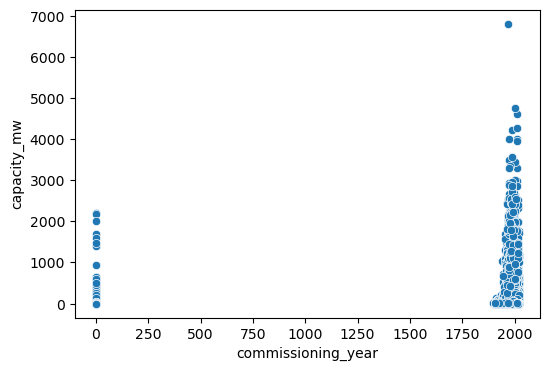

In [47]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x= 'commissioning_year', y='capacity_mw')
plt.show()

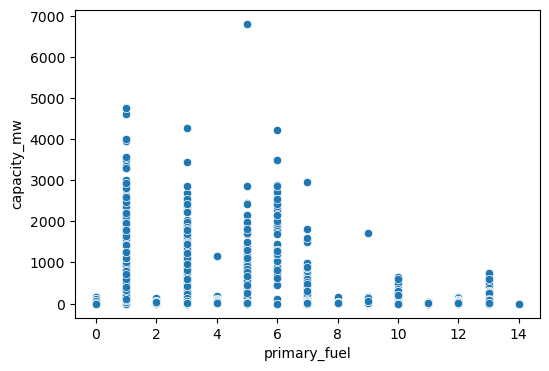

In [48]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='primary_fuel', y='capacity_mw')
plt.show()

In [49]:
# below is pair plot to represent co-relations

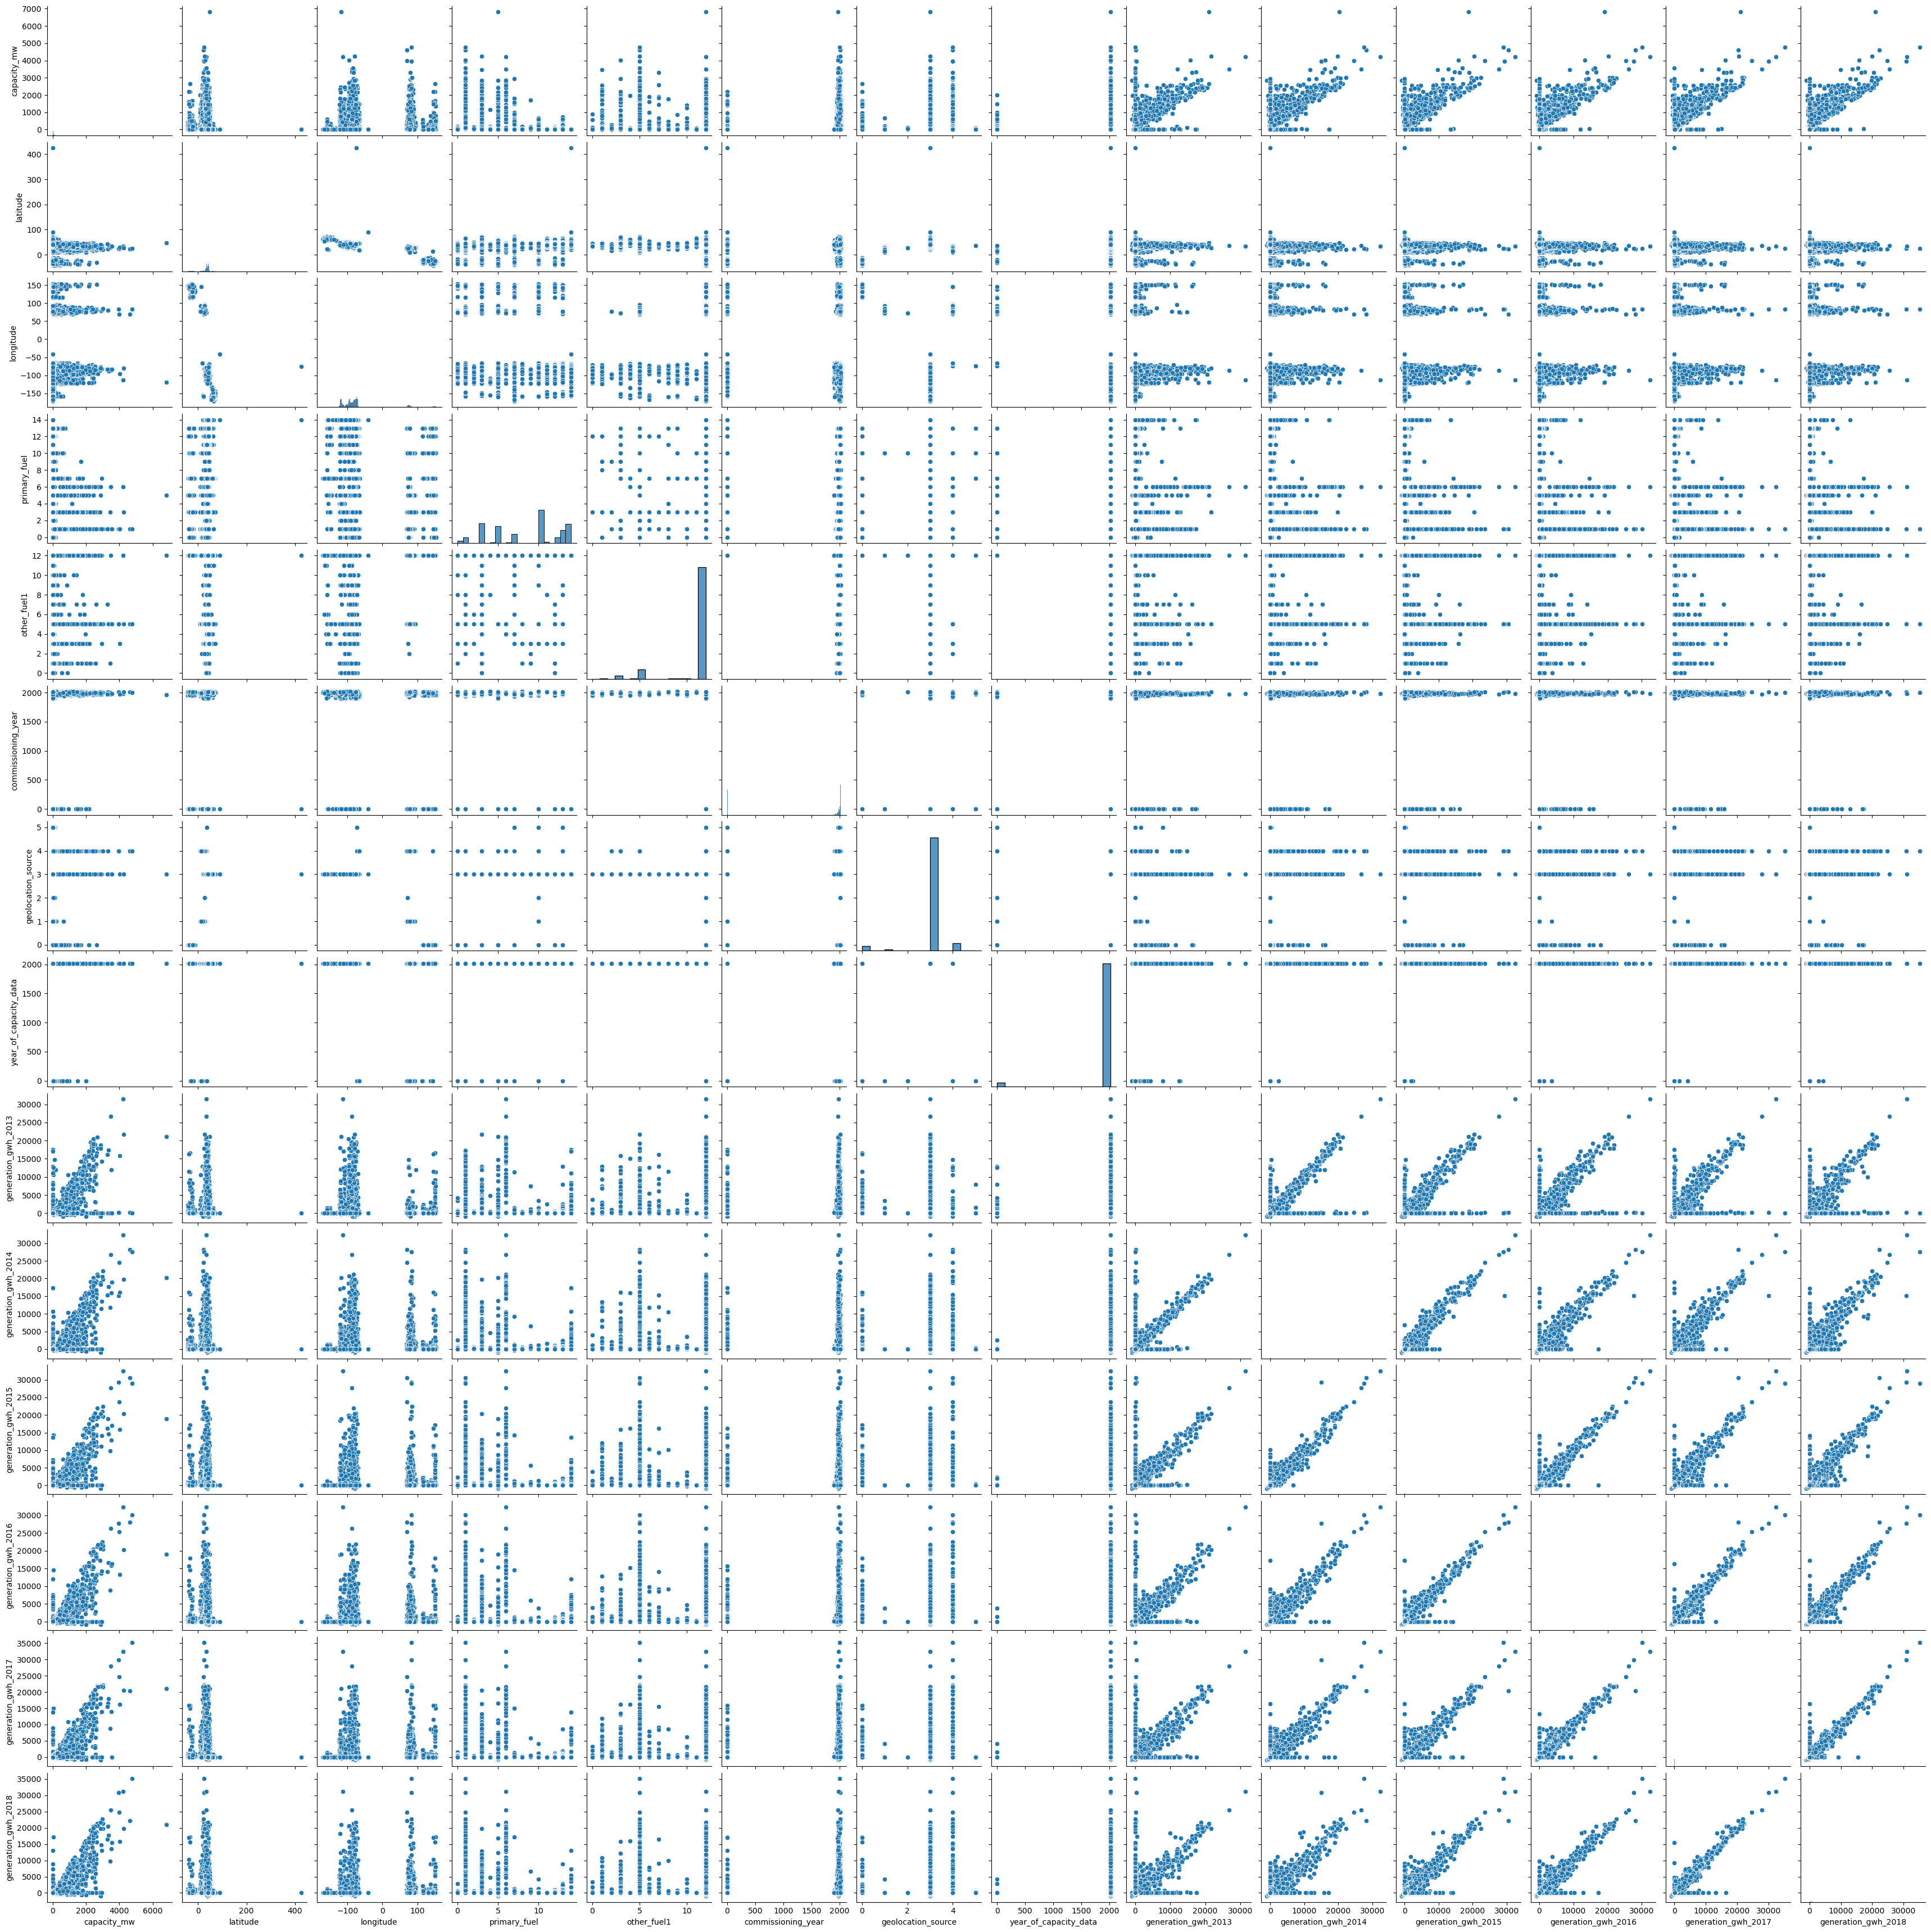

In [50]:
sns.pairplot(df)
plt.show()

In [51]:
# from above we can derived following 
# primary fuel - mainly coal is been used as primary fuel
# capacity is increased after 2000
# generation growth is equal from 2013 to 2017

In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,13292.0,117.738717,347.169038,0.0000,1.50000,5.500000,52.725000,6809.0000
latitude,13298.0,35.053213,15.398830,-42.8883,33.91425,38.330650,42.166025,425.2461
longitude,13298.0,-73.794217,62.684169,-171.7124,-104.58340,-87.104400,-75.291600,153.4341
primary_fuel,13298.0,8.411340,4.256073,0.0000,5.00000,10.000000,13.000000,14.0000
other_fuel1,13298.0,11.108964,2.475831,0.0000,12.00000,12.000000,12.000000,12.0000
commissioning_year,13298.0,1600.892011,797.830183,0.0000,1954.00000,2000.295163,2014.000000,2020.0000
geolocation_source,13298.0,2.930441,0.667393,0.0000,3.00000,3.000000,3.000000,5.0000
year_of_capacity_data,13298.0,1952.499624,360.349447,0.0000,2019.00000,2019.000000,2019.000000,2019.0000
generation_gwh_2013,13298.0,303.764303,1517.160081,-947.6000,0.00000,0.000000,27.758750,31431.0800
generation_gwh_2014,13298.0,360.179210,1680.540822,-989.6190,0.00000,0.004000,34.949500,32320.9170


In [53]:
# from above it's looks like high value of outliers in dataset

In [54]:
# checking Correlation 

<Axes: >

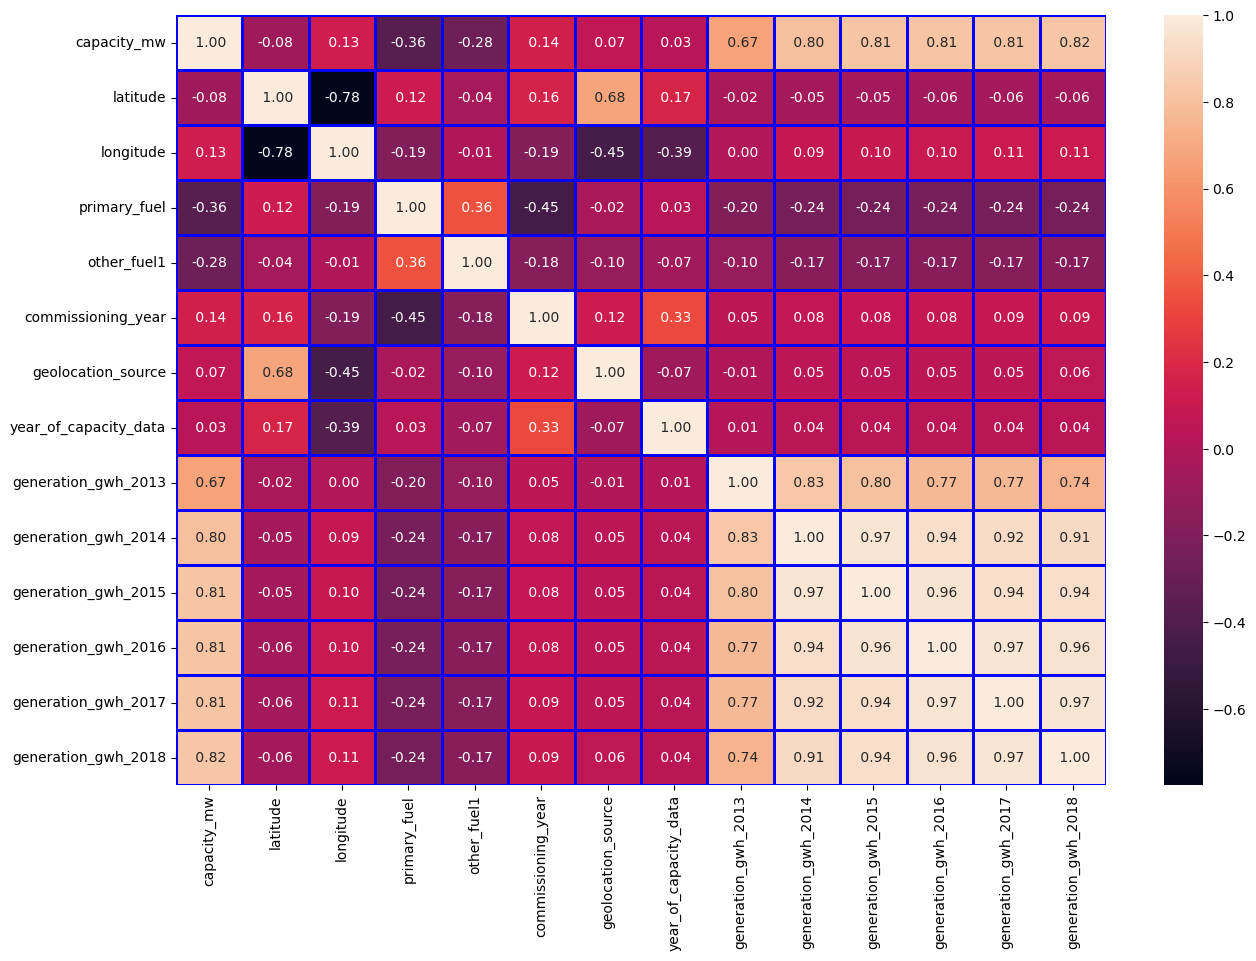

In [55]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,linewidths=1,linecolor='blue',fmt=' .2f' )

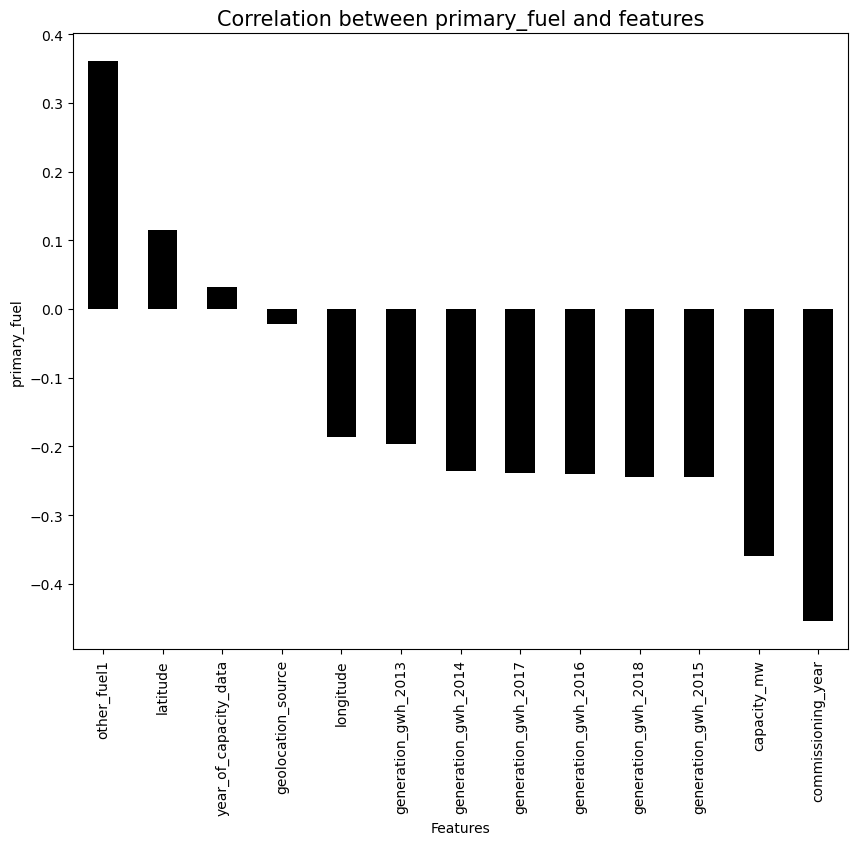

In [56]:
plt.figure(figsize=(10,8))
df.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='k')
plt.xlabel('Features',fontsize=10)
plt.ylabel('primary_fuel',fontsize=10)
plt.title('Correlation between primary_fuel and features',fontsize=15)
plt.show()

In [57]:
# from above we can see that capacity_mw is in negative in compare with primary_fuel

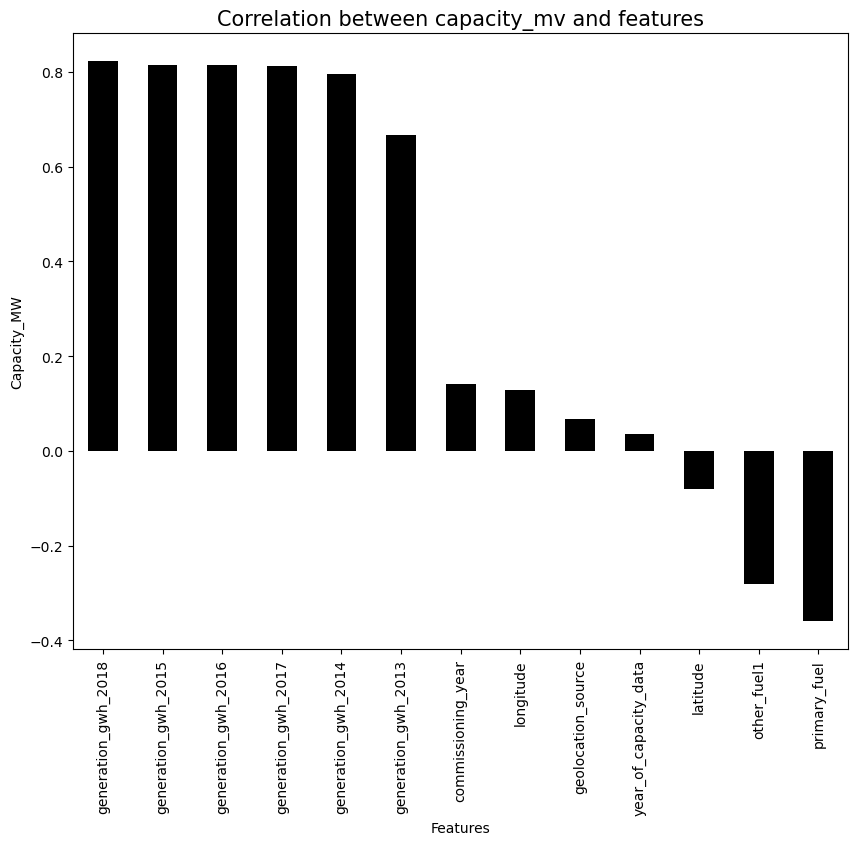

In [58]:
plt.figure(figsize=(10,8))
df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar', color='k')
plt.xlabel('Features', fontsize=10)  
plt.ylabel('Capacity_MW', fontsize=10)
plt.title('Correlation between capacity_mv and features', fontsize=15)
plt.show()

In [59]:
# checking for outliers and data distribution

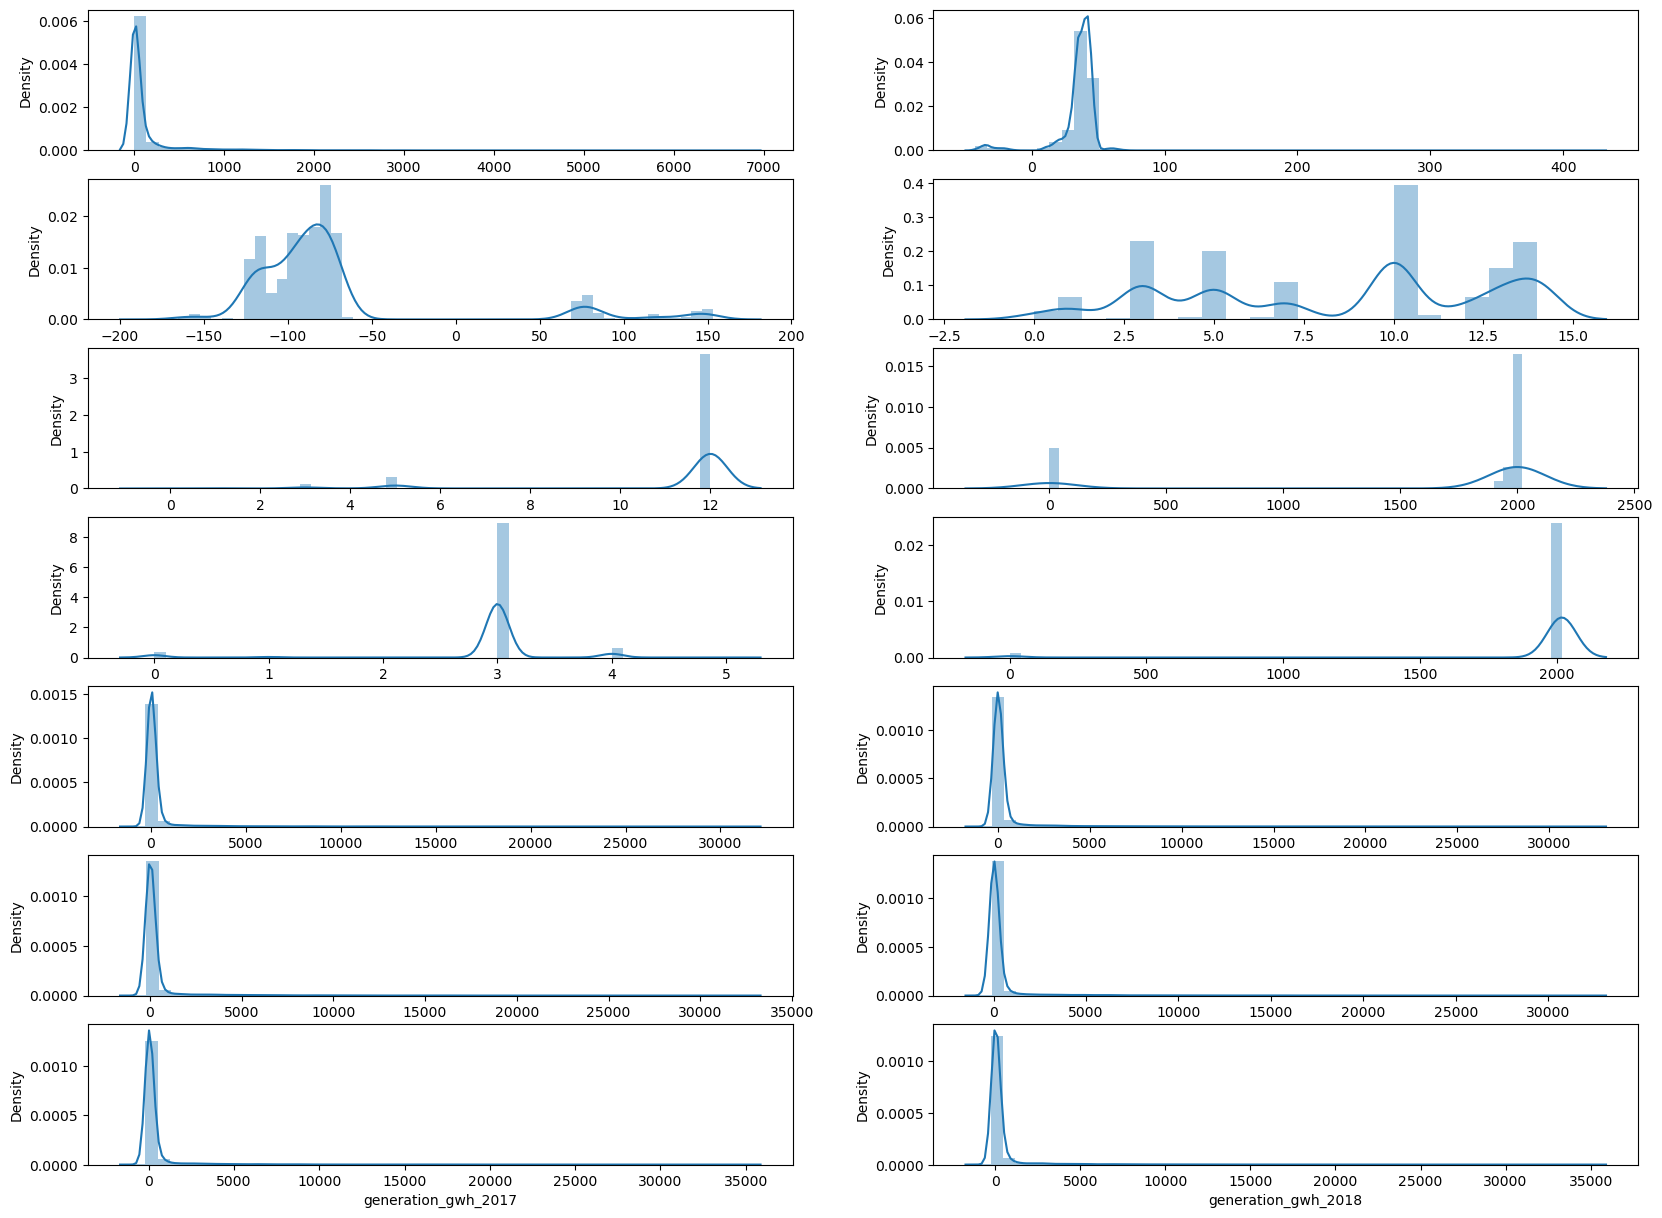

In [60]:
plt.figure(figsize = (20,15), facecolor = 'white')
p =1
for x in df:
    if p<=14:
        x1= plt.subplot(7,2,p)
        sns.distplot(df[x])
        plt.xlabel(x,fontsize=10)
        p+=1
plt.show()

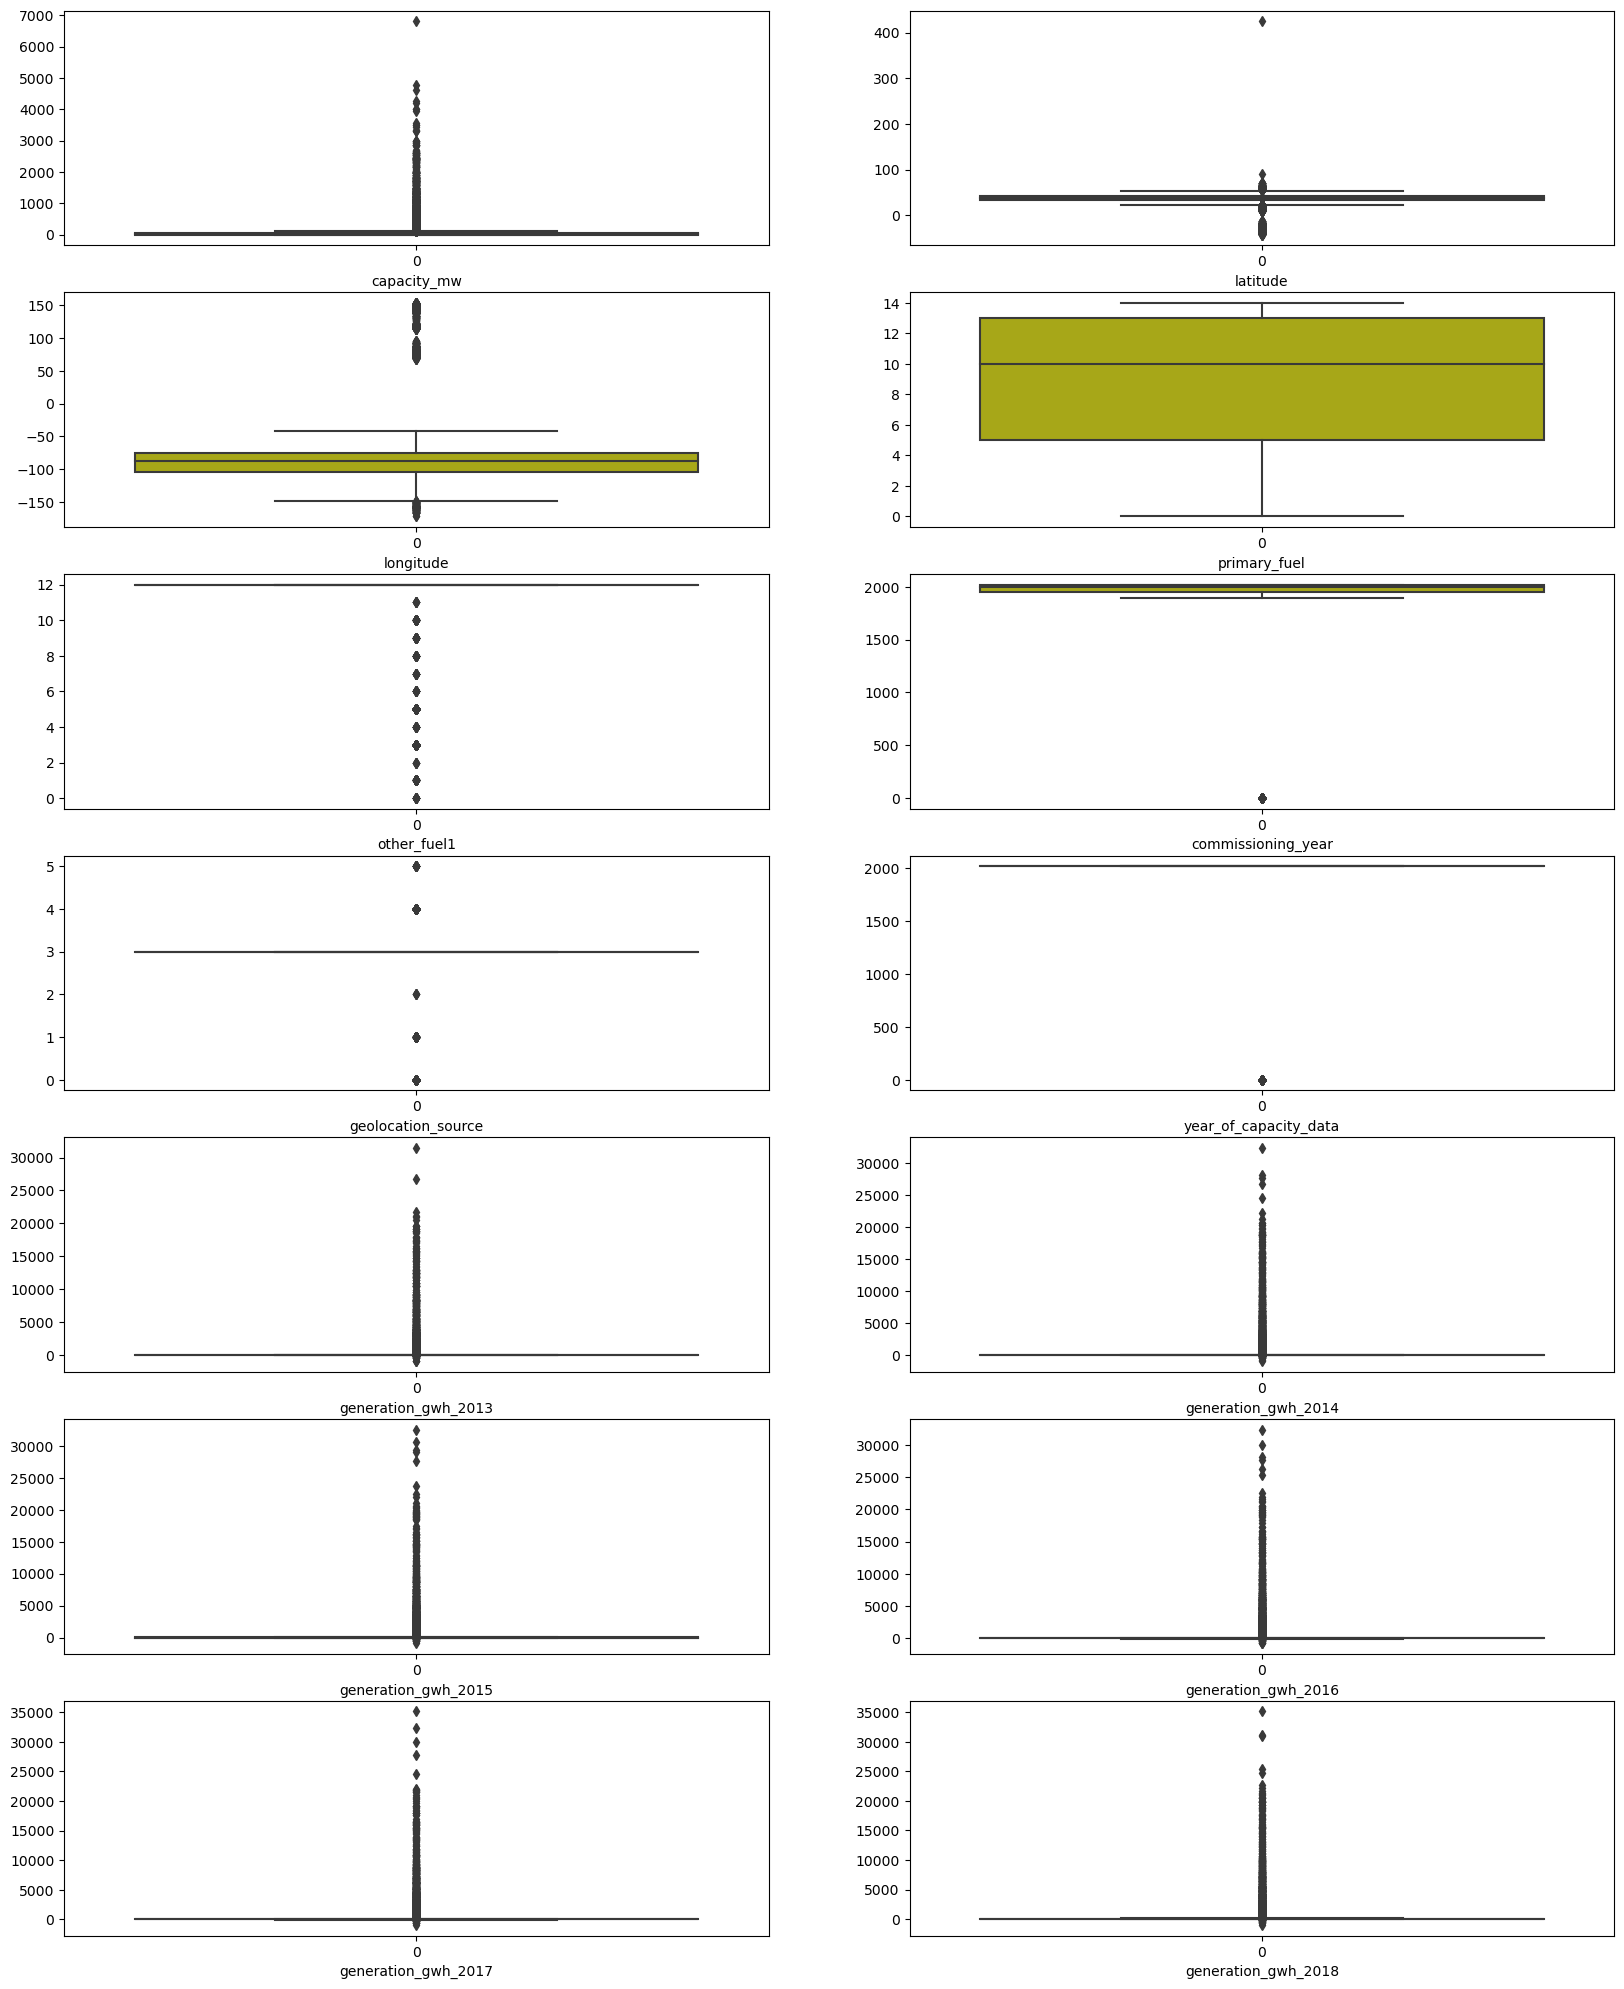

In [61]:
plt.figure(figsize=(20,25), facecolor='white')
p=1
for i in df.columns:
    if p<=14:
        plt.subplot(7,2, p)
        sns.boxplot(df[i], color='y')
        plt.xlabel(i)
    p+=1
plt.show()

In [62]:
# from above we can see that most of the columns has outliers present,  but capacity_mw and generation _gwh columns has high numbers

In [63]:
from scipy.stats import zscore
z_score =zscore(df)
z_score

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,NaN,-4.545446,3.387457,0.373283,0.359907,0.514049,-4.391044,0.184551,-0.200227,-0.214331,-0.219048,-0.218817,-0.220071,-0.223293
1,NaN,-4.545874,3.388262,0.373283,0.359907,-2.006633,-4.391044,0.184551,-0.200227,-0.214331,-0.219048,-0.218817,-0.220071,-0.223293
2,NaN,-4.553589,3.056579,1.078185,0.359907,-2.006633,-4.391044,0.184551,-0.141170,-0.153252,-0.161999,-0.161745,-0.169263,-0.168946
3,NaN,-3.821850,3.313422,0.373283,0.359907,0.505274,-4.391044,0.184551,-0.200227,-0.214331,-0.219048,-0.218817,-0.220071,-0.223293
4,NaN,-4.520261,3.391097,-0.331619,0.359907,0.519062,-4.391044,0.184551,-0.200227,-0.214331,-0.219048,-0.218817,-0.220071,-0.223293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13293,NaN,0.508739,-0.050638,1.078185,0.359907,0.515302,0.104229,0.184551,-0.197807,-0.212867,-0.217577,-0.217823,-0.219342,-0.221751
13294,NaN,0.601775,-0.301141,0.373283,0.359907,0.522823,0.104229,0.184551,-0.200227,-0.214331,-0.219048,-0.218817,-0.220071,-0.222613
13295,NaN,0.584014,-0.302572,1.313152,0.359907,-2.006633,0.104229,0.184551,-0.200227,-0.214331,-0.219048,-0.218817,-0.220071,-0.223293
13296,NaN,0.304196,-0.498116,1.313152,0.359907,-2.006633,0.104229,0.184551,-0.200227,-0.214331,-0.219048,-0.218817,-0.220071,-0.223293


In [64]:
ol =(np.abs(z_score)>3).all(axis=1)
df = df[~ol]
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.11,-34.9387,138.5377,10,12,2011.00000,0,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.00,-34.9453,138.5882,10,12,0.00000,0,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,21.60,-35.0641,117.7977,13,12,0.00000,0,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222
3,0.24,-23.7966,133.8971,10,12,2004.00000,0,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,4.00,-34.5509,138.7659,7,12,2015.00000,0,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13293,3.40,42.8869,-76.9683,13,12,2012.00000,3,2019.0,3.671000,2.460150,2.489000,1.670000,1.233490,2.630000
13294,1.00,44.3195,-92.6703,10,12,2018.00000,3,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.161000
13295,0.00,44.0460,-92.7600,14,12,0.00000,3,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
13296,0.00,39.7373,-105.0170,14,12,0.00000,3,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [65]:
#checking skewness
df.skew()

capacity_mw              5.473446
latitude                -1.864012
longitude                2.331246
primary_fuel            -0.251777
other_fuel1             -2.574767
commissioning_year      -1.506674
geolocation_source      -3.175136
year_of_capacity_data   -5.234594
generation_gwh_2013      8.531881
generation_gwh_2014      8.076996
generation_gwh_2015      8.219212
generation_gwh_2016      8.280632
generation_gwh_2017      8.359591
generation_gwh_2018      8.293077
dtype: float64

In [66]:
# skewness should be between +0.5 to -0.5 so we need to remove skewness from our data

In [67]:
from scipy.stats import boxcox
high_skew_cloumns = np.array(df.skew().abs()>0.5)
skew_columns =df.columns[high_skew_cloumns]
constants = {col:abs(df[col].min())+1 for col in skew_columns}
for col in skew_columns:
    constant = constants[col]
    df[col] = df[col].apply(lambda x:x+constant if x<=0 else x)
    transformed_col,_ = boxcox(df[col])
    df[col] = transformed_col
df.skew()

capacity_mw              114.487742
latitude                   2.901459
longitude                  0.147658
primary_fuel              -0.251777
other_fuel1               -2.318977
commissioning_year        -1.508245
geolocation_source         0.761221
year_of_capacity_data     -5.234594
generation_gwh_2013       -0.219203
generation_gwh_2014       -0.206674
generation_gwh_2015       -0.172552
generation_gwh_2016       -0.146515
generation_gwh_2017       -0.162966
generation_gwh_2018       -0.142070
dtype: float64

In [68]:
# now as per problem statement we need to predict 1] primary fuel and 2] capacity_mw

In [69]:
from sklearn.multioutput import MultiOutputRegressor

In [70]:
# now spliting data
X= df.drop(['primary_fuel', 'capacity_mw'], axis =1)
Y = df[['primary_fuel','capacity_mw']]

In [71]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13298 entries, 0 to 13297
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   primary_fuel  13298 non-null  int32  
 1   capacity_mw   13292 non-null  float64
dtypes: float64(1), int32(1)
memory usage: 259.7 KB


In [133]:
Y['capacity_mw'].fillna(0, inplace= True)

In [135]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13298 entries, 0 to 13297
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   primary_fuel  13298 non-null  int32
 1   capacity_mw   13298 non-null  int64
dtypes: int32(1), int64(1)
memory usage: 259.7 KB


In [73]:
X

,latitude,longitude,other_fuel1,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,7.229611,124.373493,3.389482e+07,196.663793,0.000000,3.842296e+12,18.818521,17.640873,15.254560,13.089287,12.534973,11.457130
1,7.223889,124.418041,3.389482e+07,0.000000,0.000000,3.842296e+12,18.818521,17.640873,15.254560,13.089287,12.534973,11.457130
2,7.120851,106.040986,3.389482e+07,0.000000,0.000000,3.842296e+12,8.477644,8.492457,7.772306,7.171599,6.529527,6.274108
3,16.605624,120.278033,3.389482e+07,196.224741,0.000000,3.842296e+12,18.818521,17.640873,15.254560,13.089287,12.534973,11.457130
4,7.565330,124.574795,3.389482e+07,196.914431,0.000000,3.842296e+12,18.818521,17.640873,15.254560,13.089287,12.534973,11.457130
...,...,...,...,...,...,...,...,...,...,...,...,...
13293,34.840265,86.456255,3.389482e+07,196.726470,4.883453,3.842296e+12,1.544854,1.004808,1.007380,0.537967,0.213459,1.033889
13294,35.960428,72.443074,3.389482e+07,197.102290,4.883453,3.842296e+12,18.818521,17.640873,15.254560,13.089287,12.534973,0.150817
13295,35.746760,72.362832,3.389482e+07,0.000000,4.883453,3.842296e+12,18.818521,17.640873,15.254560,13.089287,12.534973,11.457130
13296,32.368852,61.375549,3.389482e+07,0.000000,4.883453,3.842296e+12,18.818521,17.640873,15.254560,13.089287,12.534973,11.457130


In [74]:
#VIF

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [76]:
vif=pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(X.values,i) for i in range (len(X.columns))]
vif['Features']=X.columns
vif

,VIF values,Features
0,1.099158,latitude
1,0.793678,longitude
2,0.919947,other_fuel1
3,1.367620,commissioning_year
4,0.918483,geolocation_source
5,32.347964,year_of_capacity_data
6,2.888581,generation_gwh_2013
7,5.281945,generation_gwh_2014
8,5.505062,generation_gwh_2015
9,5.246190,generation_gwh_2016


In [77]:
# year_of_capacity_data has very high VIF as VIF<5 is represent low correlation /multicollinearity, so droping that column

In [78]:
X= X.drop(['year_of_capacity_data'], axis =1)
X

,latitude,longitude,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,7.229611,124.373493,3.389482e+07,196.663793,0.000000,18.818521,17.640873,15.254560,13.089287,12.534973,11.457130
1,7.223889,124.418041,3.389482e+07,0.000000,0.000000,18.818521,17.640873,15.254560,13.089287,12.534973,11.457130
2,7.120851,106.040986,3.389482e+07,0.000000,0.000000,8.477644,8.492457,7.772306,7.171599,6.529527,6.274108
3,16.605624,120.278033,3.389482e+07,196.224741,0.000000,18.818521,17.640873,15.254560,13.089287,12.534973,11.457130
4,7.565330,124.574795,3.389482e+07,196.914431,0.000000,18.818521,17.640873,15.254560,13.089287,12.534973,11.457130
...,...,...,...,...,...,...,...,...,...,...,...
13293,34.840265,86.456255,3.389482e+07,196.726470,4.883453,1.544854,1.004808,1.007380,0.537967,0.213459,1.033889
13294,35.960428,72.443074,3.389482e+07,197.102290,4.883453,18.818521,17.640873,15.254560,13.089287,12.534973,0.150817
13295,35.746760,72.362832,3.389482e+07,0.000000,4.883453,18.818521,17.640873,15.254560,13.089287,12.534973,11.457130
13296,32.368852,61.375549,3.389482e+07,0.000000,4.883453,18.818521,17.640873,15.254560,13.089287,12.534973,11.457130


In [79]:
X.shape

(13298, 11)

In [80]:
#scaling of data - MINMAX SCALER

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
scaler = StandardScaler()
X= scaler.fit_transform(X)
X

array([[-3.10144226,  2.6881196 ,  0.37274916, ...,  0.68963546,
         0.79747732,  0.86760844],
       [-3.10222359,  2.69046101,  0.37274916, ...,  0.68963546,
         0.79747732,  0.86760844],
       [-3.11629386,  1.7245816 ,  0.37274916, ..., -0.32705364,
        -0.29592167, -0.17192423],
       ...,
       [ 0.79268383, -0.04550801,  0.37274916, ...,  0.68963546,
         0.79747732,  0.86760844],
       [ 0.33141747, -0.62298851,  0.37274916, ...,  0.68963546,
         0.79747732,  0.86760844],
       [ 0.41979736, -0.9554157 ,  0.37274916, ..., -0.41602797,
        -0.33833066, -0.24860701]])

In [83]:
#gettign data ready for training and testing

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, r2_score

In [85]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3)


In [86]:
X_train.shape

(9308, 11)

In [87]:
X_test.shape

(3990, 11)

In [88]:
Y_train.shape

(9308, 2)

In [89]:
Y_test.shape

(3990, 2)

In [90]:
# performing ML model 

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [128]:
minMSE = float('inf') # this will initializes a variable named minMSE and sets its value to +ve(float('inf'))
bestRandomState = 0

for i in range(1, 75):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=i)
    lr = LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    current_mse = mean_squared_error(Y_test, pred)
    
    if current_mse < minMSE:
        minMSE = current_mse
        bestRandomState = i

    print("Value of MSE is ", minMSE, " at Random State ", bestRandomState)

print("Minimum MSE is ", minMSE, " at Random State ", bestRandomState)

Value of MSE is  4.612907512076188e+56  at Random State  1
Value of MSE is  2.224099670173567e+56  at Random State  2
Value of MSE is  2.224099670173567e+56  at Random State  2
Value of MSE is  2.224099670173567e+56  at Random State  2
Value of MSE is  2.224099670173567e+56  at Random State  2
Value of MSE is  2.1430168277918753e+56  at Random State  6
Value of MSE is  2.1430168277918753e+56  at Random State  6
Value of MSE is  2.1430168277918753e+56  at Random State  6
Value of MSE is  2.1430168277918753e+56  at Random State  6
Value of MSE is  2.1430168277918753e+56  at Random State  6
Value of MSE is  2.1430168277918753e+56  at Random State  6
Value of MSE is  2.1430168277918753e+56  at Random State  6
Value of MSE is  2.1430168277918753e+56  at Random State  6
Value of MSE is  2.1430168277918753e+56  at Random State  6
Value of MSE is  2.1430168277918753e+56  at Random State  6
Value of MSE is  2.1430168277918753e+56  at Random State  6
Value of MSE is  2.1430168277918753e+56  at R

In [93]:
# ###
## Minimum MSE is  2.1324184342156465e+56  at Random State  56
###


In [94]:
# Linear Regression Model

In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=33)
Lr=LinearRegression()
Lr.fit(X_train,Y_train)
pred_Lr=Lr.predict(X_test)
pred_train=Lr.predict(X_train)

print("r_2 score", r2_score(Y_test,pred_Lr ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_Lr ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_Lr))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_Lr)))

r_2 score -85.29001964230336
r_2 score on Training Data 0.1905701020662568
Mean Absolute Error: 8.203142898777968e+27
Mean Square Error: 2.139898695013905e+56
Root Square Error: 1.4628392580915735e+28


In [96]:
# Random Forest Regressor

In [97]:
RFR=RandomForestRegressor()
RFR.fit(X_train, Y_train)
RFR.fit(X_train,Y_train)
pred_RFR=RFR.predict(X_test)
pred_train=RFR.predict(X_train)

print("r_2 score", r2_score(Y_test,pred_RFR ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_RFR ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_RFR))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_RFR)))

r_2 score 0.25600858648275826
r_2 score on Training Data 0.8735916606000931
Mean Absolute Error: 6.818203354476301e+25
Mean Square Error: 1.435415216738161e+54
Root Square Error: 1.1980881506542667e+27


In [98]:
# KNN

In [99]:
knn=KNN()

knn.fit(X_train, Y_train)
knn.fit(X_train,Y_train)
pred_knn=knn.predict(X_test)
pred_train=knn.predict(X_train)

print("r_2 score", r2_score(Y_test,pred_knn ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_knn ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_knn))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_knn)))

r_2 score -2494.511290181317
r_2 score on Training Data 0.548134892932626
Mean Absolute Error: 9.383113295371148e+26
Mean Square Error: 6.210909511170498e+57
Root Square Error: 7.880932375785557e+28


In [100]:
#Gradient Boosting Regressor

In [101]:
gbb=GradientBoostingRegressor()
multioutput_gbb = MultiOutputRegressor(gbb)

multioutput_gbb.fit(X_train, Y_train)
multioutput_gbb.fit(X_train,Y_train)
pred_gbb=multioutput_gbb.predict(X_test)
pred_train=multioutput_gbb.predict(X_train)

print("r_2 score", r2_score(Y_test,pred_gbb ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_gbb ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_gbb))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_gbb)))

r_2 score -0.2935965961714122
r_2 score on Training Data 0.8489528267010495
Mean Absolute Error: 7.824957344241304e+25
Mean Square Error: 2.796813833008371e+54
Root Square Error: 1.672367732590046e+27


In [102]:
# Lasso Model

In [103]:
lasso=Lasso()
lasso.fit(X_train, Y_train)
lasso.fit(X_train,Y_train)
pred_lasso=lasso.predict(X_test)
pred_train=lasso.predict(X_train)

print("r_2 score", r2_score(Y_test,pred_lasso ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_lasso ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_lasso))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_lasso)))

r_2 score -85.37084757514128
r_2 score on Training Data 0.11042842455853025
Mean Absolute Error: 8.203142898777971e+27
Mean Square Error: 2.1398986950139054e+56
Root Square Error: 1.4628392580915737e+28


In [104]:
#Ridge Model

In [105]:
rd=Ridge()
rd.fit(X_train, Y_train)
rd.fit(X_train,Y_train)
pred_rd=rd.predict(X_test)
pred_train=rd.predict(X_train)

print("r_2 score", r2_score(Y_test,pred_rd ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_rd ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_rd))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_rd)))

r_2 score -85.27947430374017
r_2 score on Training Data 0.19057009900887784
Mean Absolute Error: 8.20271923061508e+27
Mean Square Error: 2.1396362458797387e+56
Root Square Error: 1.4627495499502772e+28


In [106]:
# Decision Tree Regressor

In [107]:
dtr= DecisionTreeRegressor()
dtr.fit(X_train, Y_train)
dtr.fit(X_train,Y_train)
pred_dtr=dtr.predict(X_test)
pred_train=dtr.predict(X_train)

print("r_2 score", r2_score(Y_test,pred_dtr ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_dtr ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_dtr))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_dtr)))

r_2 score -0.6891211412647951
r_2 score on Training Data 0.9964525214044065
Mean Absolute Error: 8.002449712138136e+25
Mean Square Error: 3.343929911035196e+54
Root Square Error: 1.8286415479899814e+27


In [108]:
 # Extra Trees Regressor

In [109]:
etr=ExtraTreesRegressor()

etr.fit(X_train, Y_train)
etr.fit(X_train,Y_train)
pred_etr=etr.predict(X_test)
pred_train=etr.predict(X_train)

print("r_2 score", r2_score(Y_test,pred_etr ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_etr ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_etr))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_etr)))

r_2 score -4584.971638426326
r_2 score on Training Data 0.9945229302488723
Mean Absolute Error: 1.6139862776213643e+27
Mean Square Error: 1.1414296864003802e+58
Root Square Error: 1.0683771274228873e+29


In [110]:
#difference between R2 score of Linear Regression and Cross Validation Score

In [111]:
score=cross_val_score(Lr, X, Y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_Lr )- score.mean())

[ -0.35914258 -16.20770783   0.2031868   -0.90272843  -0.30425342]
-3.5141290923603714
Difference between r_2 score and Cross Validation score is -81.77589054994299


In [112]:
# difference between R2 score of Random Fores and CVS

In [113]:
score1=cross_val_score(RFR, X, Y, cv=5, scoring='r2')
print(score1)
print(score1.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_RFR )- score1.mean())

[-1.28264382e+00 -1.84839498e+03  3.44247309e-01 -2.68984499e+02
 -2.12858713e+02]
-466.23531820151345
Difference between r_2 score and Cross Validation score is 466.49132678799623


In [114]:
# difference between R2 score of KNN and CVS

In [115]:
score2=cross_val_score(knn, X, Y, cv=5, scoring='r2')
print(score2)
print(score2.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_knn )- score2.mean())

[ 9.99104353e-02 -8.81305462e+02  3.08172773e-01  3.07284732e-01
  3.62889944e-01]
-176.04544088242997
Difference between r_2 score and Cross Validation score is -2318.465849298887


In [116]:
# difference between Gradient Boost and CVS

In [117]:
score3=cross_val_score(multioutput_gbb, X, Y, cv=5, scoring='r2')
print(score3)
print(score3.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_gbb )- score3.mean())

[ 2.36540602e-01 -2.70258843e+02  3.51970837e-01 -4.50525683e+01
 -5.92585485e+02]
-181.4616769690093
Difference between r_2 score and Cross Validation score is 181.16808037283786


In [118]:
# difference between R2 score of Lasso and CVS

In [119]:
score4=cross_val_score(lasso, X, Y, cv=5, scoring='r2')
print(score4)
print(score4.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_lasso )- score4.mean())

[ -0.2380909  -16.29087544   0.11554138  -0.97383822  -0.39622915]
-3.5566984665463446
Difference between r_2 score and Cross Validation score is -81.81414910859493


In [120]:
# difference between R2 score of Ridge and CVS

In [121]:
score5=cross_val_score(rd, X, Y, cv=5, scoring='r2')
print(score5)
print(score5.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_lasso )- score5.mean())

[ -0.35847318 -16.20587473   0.20318131  -0.902598    -0.30419918]
-3.5135927565788982
Difference between r_2 score and Cross Validation score is -81.85725481856238


In [122]:
# difference between R2 score of Decession tree and CVS

In [123]:
score6=cross_val_score(dtr, X, Y, cv=5, scoring='r2')
print(score6)
print(score6.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_dtr )- score6.mean())

[ 3.65101475e-02 -3.59516937e+00  1.41728714e-01 -4.90179979e-01
 -9.58299553e+02]
-192.44133275605336
Difference between r_2 score and Cross Validation score is 191.75221161478856


In [124]:
# difference between R2 score of Extra Tree regressor and CVS

In [125]:
score8=cross_val_score(etr, X, Y, cv=5, scoring='r2')
print(score8)
print(score8.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_etr )- score8.mean())

[ 3.38307356e-01 -1.62925912e+03  3.59286298e-01 -7.80621068e+01
 -2.78716904e-01]
-341.3804693239985
Difference between r_2 score and Cross Validation score is -4243.5911691023275


In [ ]:
### I am not sure where I have made what mistake I have gone through all of it again and again still not able to rectify mistake 
# as above output is ot correct. as it should be around 0 t0 +/-1 but it's coming with juge difference. 